<a href="https://colab.research.google.com/github/ArielaLevkov/ImageProcessing_TA/blob/main/ImageProcessingRecitation_04_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [2]:
GITHUB_PATH = 'https://raw.githubusercontent.com/ArielaLevkov/ImageProcessing_TA/main/images/'

def read_file(fname:str, file_path:str=GITHUB_PATH) -> np.ndarray:
    '''
    Accept an image file name (defaulty located in GitHub) and return the image
    in a numpy array.

    Args:
        fname: the file name
        file_path: the file path.. Default value is Ariela's Github repo.

    Returns:
        the image converted into a Numpy array.
    '''
    file_path = os.path.join(file_path, fname)
    response = requests.get(file_path)
    fp = BytesIO(response.content)

    img_pil = PIL.Image.open(fp)
    return np.array(img_pil, dtype='int16')

In [3]:
def plot_images(img1:np.array, img2:np.array):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    axes[0].imshow(img1,  cmap='gray')
    axes[1].imshow(img2,  cmap='gray')

<div dir="rtl">

# הצגת תמונות בצורה דינאמית:
בקונבולוציה כל שינוי מתרחש ברמת הפיקסל, ולכן כדאי לראות מקרוב את ההשפעה של המסננים על אזורים שונים בתמונה. שימוש ב־Plotly מאפשר לבצע זום, להזיז את התצוגה, ולבחון ערכים ספציפיים של פיקסלים בצורה נוחה.
<div>


In [4]:
import plotly.express as px

img = read_file(fname='house.tiff') / 255
fig = px.imshow(img, color_continuous_scale='gray')
fig.update_layout(coloraxis_showscale=False)

<div dir="rtl">

# 4. קונבולוציה:
קונבולוציה היא תהליך שבו כל פיקסל מקבל ערך חדש לפי השכנים שלו, באמצעות מסכה שמחליקה, מחדדת או מדגישה פרטים.

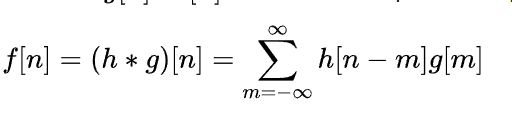

<div dir="rtl">

מתמטית, קונבולוציה היא פעולה קומוטטיבית.
אבל בעיבוד תמונה (במיוחד 2D) זה לא נכון בפועל,
בגלל שהמסננים אינם סימטריים, ויישום הקונבולוציה הוא למעשה קורלציה ולא קונבולוציה טהורה, נראה זאת בהמשך.

<div dir="rtl">

ספריית `scipy`:

In [5]:
from scipy.signal import convolve

<div dir="rtl">
שימושים:

* NumPy לא תומכת בקונבולוציה דו־ממדית (רק במימד 1)
* שימוש בפרמטר `mode` הקובע איך לטפל בגבולות התמונה: `valid`, `full` , `same`

# 4.1 Convolution - valid mode


<div dir="rtl">

מבצעים קונבולוציה רק במקומות שבהם המסנן מתאים כולו לתוך הדאטה ללא הוספת פיקסלים בשוליים.

In [6]:
convolve(in1=[14,50,10,11,13,40], in2=[4,1,2], mode='valid')

array([118, 154,  83, 195])

<div dir="rtl">

שימו לב שהווקטור השני (in2) מתהפך (כדי שיהיה קומוטטיבי):

In [7]:
convolve(in1=[4,1,2], in2=[14,50,10,11,13,40], mode='valid')

array([118, 154,  83, 195])

<div dir="rtl">

קונבולוציה ידנית בלי שימוש בפונקציה המובנית

In [ ]:
in1 = np.array([14,50,10,11,13,40])
in2 = np.array([4,1,2])
print([np.dot(in1[i:i+len(in2)], np.flip(in2)) for i in range(0, len(in1)-len(in2)+1)])

<div dir="rtl">

בvalid המסנן חייב להתאים בדיוק לתוך הקלט ולכן התוצאה קטנה יותר

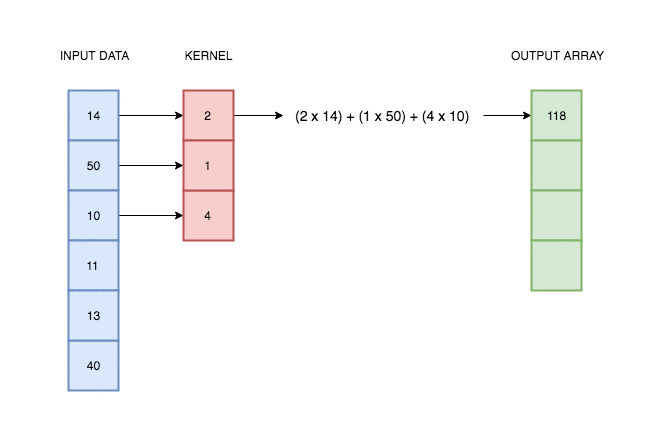

## 4.2 Full and Same modes

<div dir="rtl">

במצב SAME -  שמירה על גודל התמונה המקורית

<div dir="rtl">

* SciPy עושה zero-padding למסנן בצדדים (עד לגודל של התמונה המקורית)

* מבצעת קונבולוציה רגילה

* לוקחת בדיוק את מרכז התוצאה כך שהאורך נשאר זהה

In [8]:
convolve(in1=[14,50,10,11,13,40], in2=[4,1,2], mode='same')

array([214, 118, 154,  83, 195,  66])

<div dir="rtl">

במצב FULL - מתקבלת התוצאה הגדולה ביותר האפשרית

* SciPy עושה zero-padding למסנן בצדדים (עד לגודל המקסימלי של הקונבולוציה)

* מבצעת קונבולוציה רגילה

In [9]:
convolve(in1=[14,50,10,11,13,40], in2=[4,1,2], mode='full')

array([ 56, 214, 118, 154,  83, 195,  66,  80])

<div dir="rtl">

# 4.3 קרוס-קורולציה:

In [ ]:
from scipy.signal import correlate

<div dir="rtl">

קרוס-קורולציה היא פעולה הדומה מאוד לקונבולוציה,
אבל בלי היפוך (flip) של המסנן

<div dir="rtl">

קונבולוציה היא פעולה קומוטטיבית:

In [ ]:
print(convolve(in1=[1,2,3,4,5], in2=[6,7,8,9,10], mode='same'))
print(convolve(in1=[6,7,8,9,10], in2=[1,2,3,4,5], mode='same'))

<div dir="rtl">

בעוד שקרולוציה לא קומוטטיבית:

In [ ]:
print(correlate(in1=[1,2,3,4,5], in2=[6,7,8,9,10], mode='same'))
print(correlate( in1=[6,7,8,9,10], in2=[1,2,3,4,5], mode='same'))

<div dir="rtl">

שימו לב:

* ברוב המימושים המעשיים כולל CNN (רשתות קונבולוציה),
הפונקציה שמשתמשים בה היא קורלציה, ולא קונבולוציה אמיתית
* אופרטור הקונבולוציה:
$C=A \ast B$

<div dir="rtl">

# 4.4 מסנן ממוצע (Mean filter):

Low-pass filter מסנן רעש ותדרים גבוהים

<div dir="rtl">

בכל נקודה אנחנו מחליפים את הערך בממוצע של השכנים.

<div dir="rtl">

קונבולציה על 1D:

In [10]:
v = convolve(in1=[0,0,0,0,1,1,1,1], in2=[1/3,1/3,1/3], mode='same')
print([f'{a:.2f},' for a in v])

['0.00,', '0.00,', '0.00,', '0.33,', '0.67,', '1.00,', '1.00,', '0.67,']


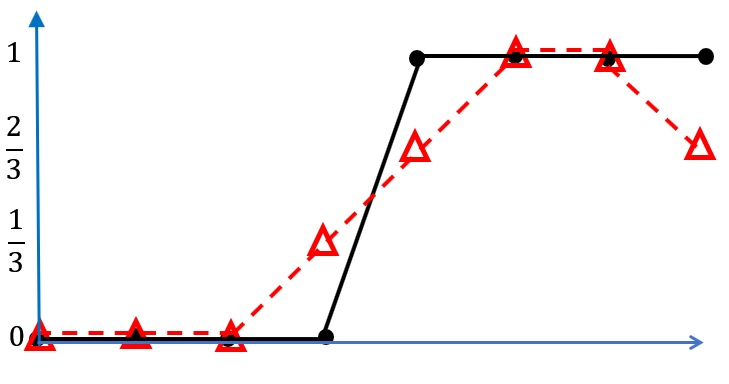

<div dir="rtl">

קונבולציה על 2D:

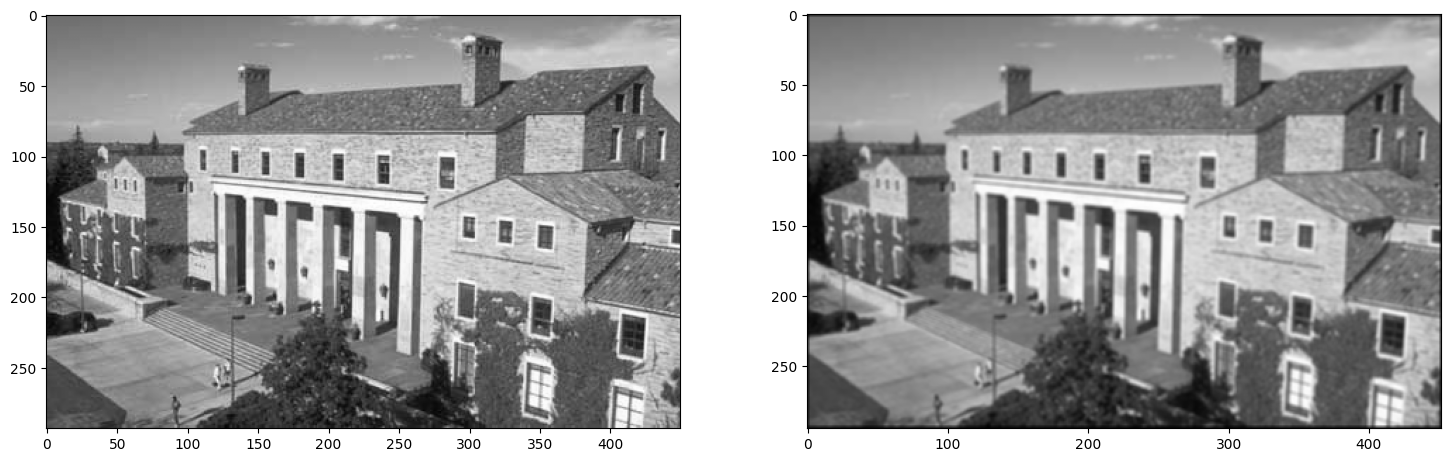

In [11]:
img = read_file(fname='house.tiff') / 255

FILTER_SIZE = 3
filter=np.ones(shape=(FILTER_SIZE, FILTER_SIZE))
filter = filter / filter.sum()
img1 = convolve(in1=img, in2=filter)

plot_images(img, img1)

<div dir="rtl">

למה מחלקים בסכום של המסנן? (FILTER_SIZE = 9)

0.9800532558702492


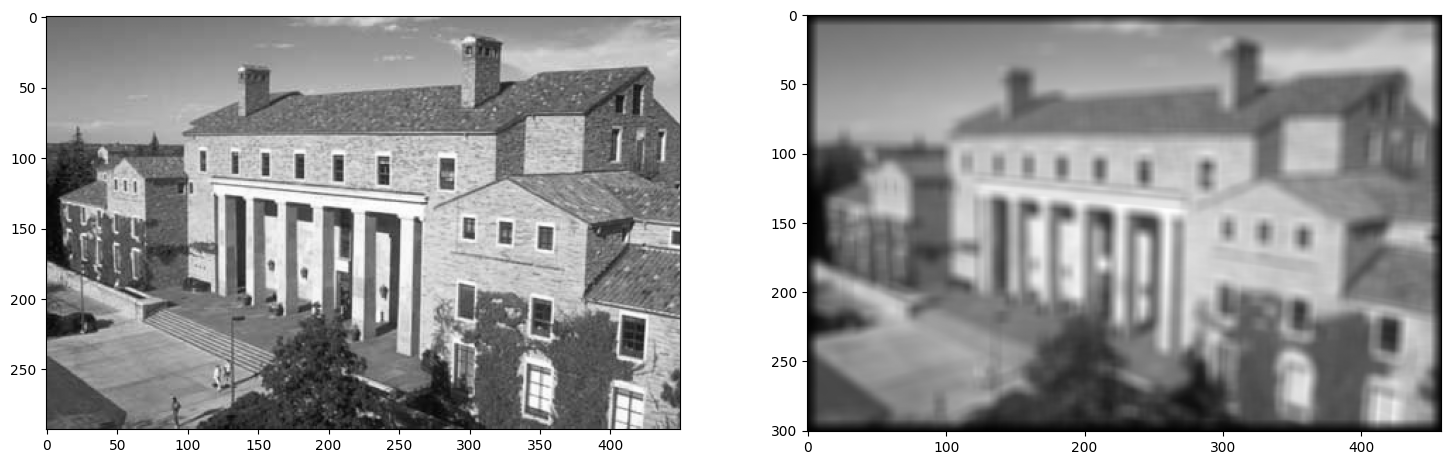

In [12]:
# here we devide:
FILTER_SIZE = 9
filter=np.ones(shape=(FILTER_SIZE, FILTER_SIZE))
filter = filter / filter.sum()

img1 = convolve(in1=img, in2=filter)

plot_images(img, img1)
print(img1.max())

79.38431372549022


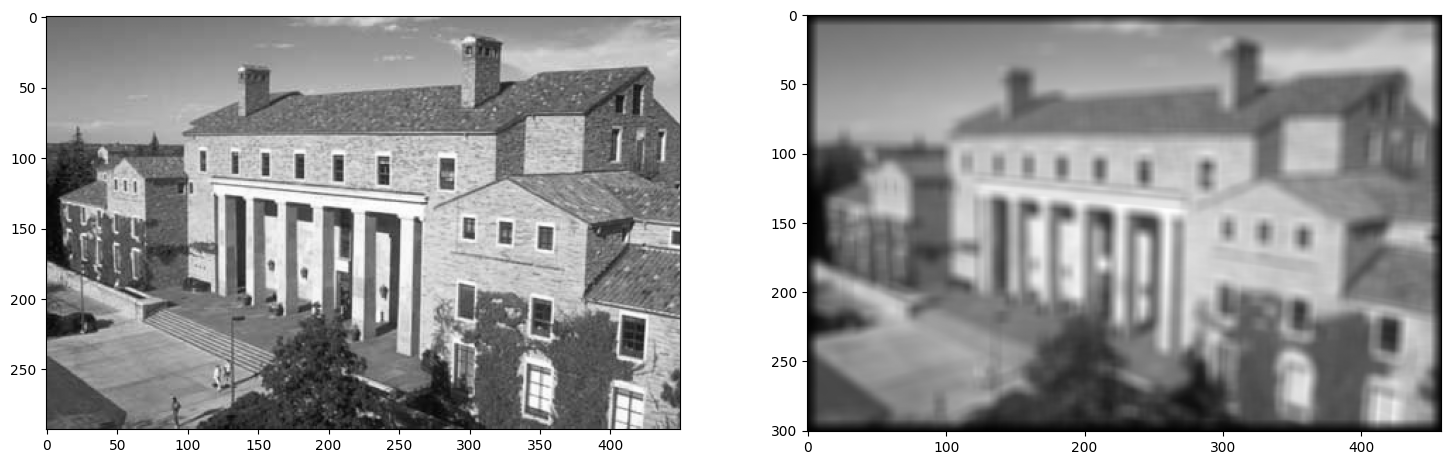

In [13]:
# here we don't devide:
FILTER_SIZE = 9
filter=np.ones(shape=(FILTER_SIZE, FILTER_SIZE))
filter = filter # / filter.sum()

img2 = convolve(in1=img, in2=filter)

plot_images(img, img2)
print(img2.max())

<div dir="rtl">

# 4.5 מסנן גאוסיאני:

Low-pass filter מסנן רעש ותדרים גבוהים אבל חכם יותר

בניגוד מסנן ממוצע שבו כל השכנים שווים,
במסנן גאוסיאני השכן המרכזי חשוב יותר, והשכנים הרחוקים תורמים פחות

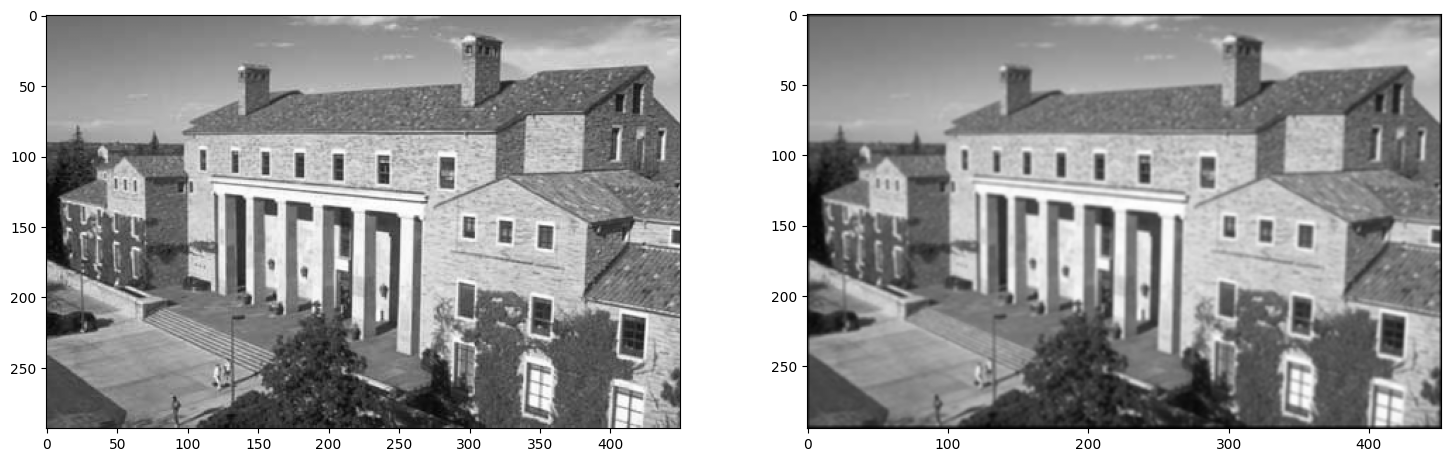

In [14]:
filter=np.array([[1,1,1],[1,2,1],[1,1,1]])
filter = filter / filter.sum()
img1 = convolve(in1=img, in2=filter)

plot_images(img, img1)

<div dir="rtl">


#4.5 Edge Detector גילוי קצוות

<div dir="rtl">

בעזרת קונבולוציה עם מסנן מתאים אפשר לגלות קצוות (שינויים חדים באות/בתמונה).

In [15]:
v = convolve(in1=[0,0,0,0,1,1,1,1], in2=[-1,2,-1], mode='same')
print([f'{a:.2f},' for a in v])

['0.00,', '0.00,', '0.00,', '-1.00,', '1.00,', '0.00,', '0.00,', '1.00,']


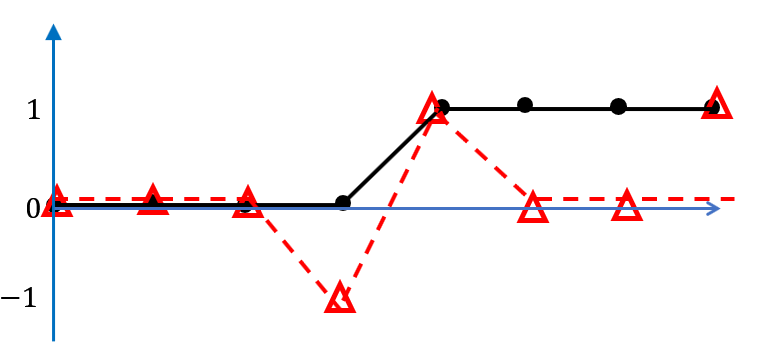

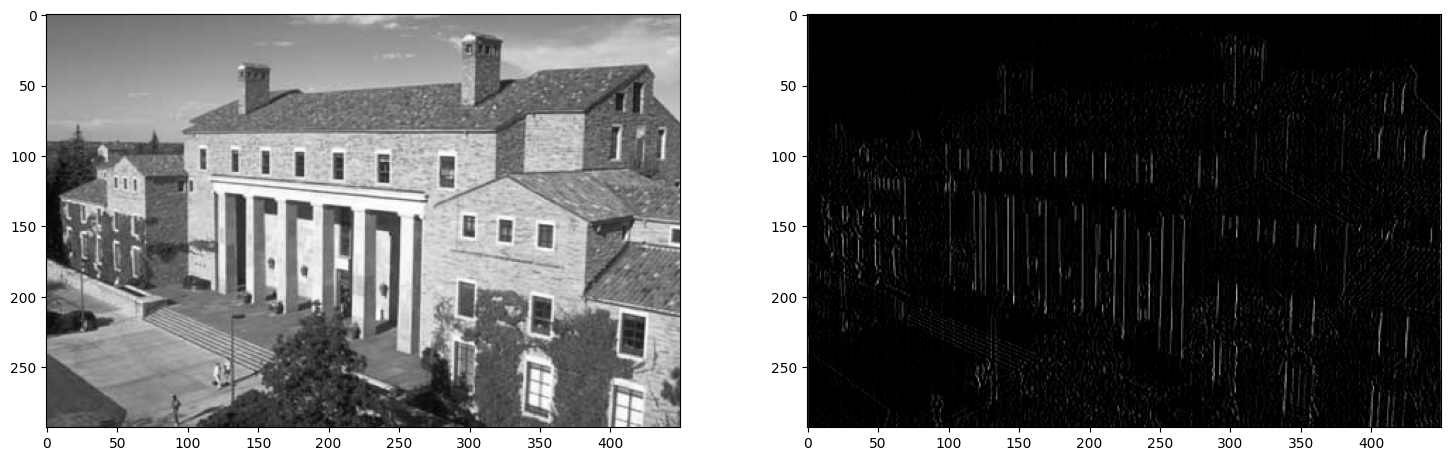

In [16]:
filter=np.array([[-1,2,-1]])
img1 = convolve(img, filter, 'same')
img1 = np.clip(img1, a_min=0, a_max=1)
plot_images(img, img1)